# Pointcloud-to-Simplicial Random Flag Complex Lifting Tutorial

***
This notebook shows how to import a dataset, with the desired lifting, and how to run a neural network using the loaded data.

The notebook is divided into sections:

- [Loading the dataset](#loading-the-dataset) loads the config files for the data and the desired tranformation, createsa a dataset object and visualizes it.
- [Loading and applying the lifting](#loading-and-applying-the-lifting) defines a simple neural network to test that the lifting creates the expected incidence matrices.
- [Create and run a simplicial nn model](#create-and-run-a-simplicial-nn-model) simply runs a forward pass of the model to check that everything is working as expected.

***
***

Note that for simplicity the notebook is setup to use a simple graph. However, there is a set of available datasets that you can play with.

To switch to one of the available datasets, simply change the *dataset_name* variable in [Dataset config](#dataset-config) to one of the following names:

* cocitation_cora
* cocitation_citeseer
* cocitation_pubmed
* MUTAG
* NCI1
* NCI109
* PROTEINS_TU
* AQSOL
* ZINC
***

### Imports and utilities

In [ ]:
# # With this cell any imported module is reloaded before each cell execution
# %load_ext autoreload
# %autoreload 2
# from modules.data.load.loaders import GraphLoader
# from modules.data.preprocess.preprocessor import PreProcessor
# from modules.utils.utils import (
#     describe_data,
#     load_dataset_config,
#     load_model_config,
#     load_transform_config,
# )

## Loading the Dataset

Here we just need to spicify the name of the available dataset that we want to load. First, the dataset config is read from the corresponding yaml file (located at `/configs/datasets/` directory), and then the data is loaded via the implemented `Loaders`.


In [ ]:
# dataset_name = "manual_dataset"
# dataset_config = load_dataset_config(dataset_name)
# loader = GraphLoader(dataset_config)


Dataset configuration for manual_dataset:

{'data_domain': 'graph',
 'data_type': 'toy_dataset',
 'data_name': 'manual',
 'data_dir': 'datasets/graph/toy_dataset',
 'num_features': 1,
 'num_classes': 2,
 'task': 'classification',
 'loss_type': 'cross_entropy',
 'monitor_metric': 'accuracy',
 'task_level': 'node'}


We can then access to the data through the `load()`method:


Dataset only contains 1 sample:


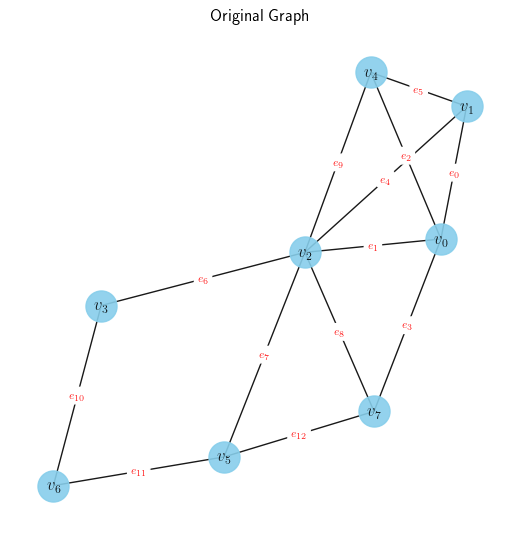

 - Graph with 8 vertices and 13 edges.
 - Features dimensions: [1, 0]
 - There are 0 isolated nodes.



In [ ]:
# dataset = loader.load()
# describe_data(dataset)

## Loading and Applying the Lifting

Now we instantiate the lift. This application will produce a **Random Flag Complex**, that is a **Flag Complex** that sampled from a distribution $\mathcal{X}(n, p)$ similarly to a **Random Graph**. This consists of sampling from the space of all possible edges between $n$ nodes with a probability of an edge appearing being $p$. Then, we will find the cliques in this graph which will come to be a **Flag Complex**. In this particular case we define $p$ to be determined by $p=n^{-\alpha}$ where $\alpha$ is a parameter that can be changed in the configuration. However, for other particular tests $p$ can also be altered independently. It is worth noting that a **Flag Complex** is another name for the **clique complex** or **Vietoris-Ripps** complex and any simplicial complex is homeomorphic to it. In [[1]](https://arxiv.org/pdf/1301.7165) some nice properties are explore in regard to the relationship between the value $p$ takes and the likelyhood of the $k$-th homology group $H_k(X) = 0$. As they show, when $p$ the $k$-th homology will either monotonically increase to a point or monotonically decrease from a maximum, with a higher stretch the higher the $k$. This allows for the generation of particular simplcial complexes with certain homological properties from unstructured point clouds.

***
[[1]](https://arxiv.org/pdf/1301.7165) Kahle, M. (2014). Topology of random simplicial complexes: a survey. AMS Contemp. Math, 620, 201-222.

***

In [ ]:
# # Define transformation type and id
# transform_type = "liftings"
# # If the transform is a topological lifting, it should include both the type of the lifting and the identifier
# transform_id = "pointcloud2simplicial/random_flag_complex_lifting"

# # Read yaml file
# transform_config = {
#     "lifting": load_transform_config(transform_type, transform_id)
#     # other transforms (e.g. data manipulations, feature liftings) can be added here
# }


Transform configuration for pointcloud2simplicial/random_flag_complex_lifting:

{'transform_type': 'lifting',
 'transform_name': 'RandomFlagComplexLifting',
 'complex_dim': 3,
 'alpha': 1.5,
 'steps': 10,
 'signed': True,
 'feature_lifting': 'ProjectionSum'}


We than apply the transform via our `PreProcesor`:

Processing...
/Users/martincarrasco/miniconda3/envs/topox/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Done!


0.04419417382415922
Transform parameters are the same, using existing data_dir: /Users/martincarrasco/Documents/VU/research/tdl/challenge-icml-2024/datasets/graph/toy_dataset/manual/lifting/3038941572

Dataset only contains 1 sample:


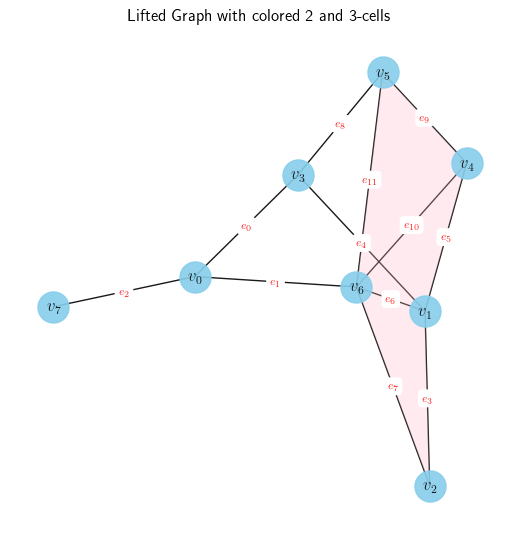

 - The complex has 8 0-cells.
 - The 0-cells have features dimension 1
 - The complex has 12 1-cells.
 - The 1-cells have features dimension 1
 - The complex has 3 2-cells.
 - The 2-cells have features dimension 1



In [ ]:
# lifted_dataset = PreProcessor(dataset, transform_config, loader.data_dir, force_reload=True)
# describe_data(lifted_dataset)

In [ ]:
# lifted_dataset[0].betti

tensor([1, 2, 0])

## Create and Run a Simplicial NN Model

In this section a simple model is created to test that the used lifting works as intended. In this case the model uses the `up_laplacian_1` and the `down_laplacian_1` so the lifting should make sure to add them to the data.

In [ ]:
# from modules.models.simplicial.san import SANModel

# model_type = "simplicial"
# model_id = "san"
# model_config = load_model_config(model_type, model_id)

# model = SANModel(model_config, dataset_config)


Model configuration for simplicial SAN:

{'in_channels': None,
 'hidden_channels': 32,
 'out_channels': None,
 'n_layers': 2,
 'n_filters': 2,
 'order_harmonic': 5,
 'epsilon_harmonic': 0.1}


In [ ]:
# y_hat = model(lifted_dataset.get(0))

If everything is correct the cell above should execute without errors. 